## Problem Statement

The goal of this python notebook is to create a KNN model using scikit learn to create a model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df = pd.read_csv('sonar-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Exploratory Data Analysis and Data Visualization

In [4]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


We see that a total of 60 frequencies are present giving the label. let us first see the distribution of the data points. But it is difficult to take all freqeuncies into consideration, so let us find which ones are better to choose

In [5]:
#assigning R as 0 and M as 1 for model processing
df['Label'] = df['Label'].map({'R':0,'M':1})

In [6]:
df.corr()['Label'].sort_values()

Freq_36   -0.269151
Freq_35   -0.227670
Freq_37   -0.209055
Freq_34   -0.172010
Freq_31   -0.110728
             ...   
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, Length: 61, dtype: float64

So, we will consider the top three correlated frequencies to build our KNN model.

In [7]:
df_new = df[['Freq_11', 'Freq_12', 'Freq_49', 'Label']]

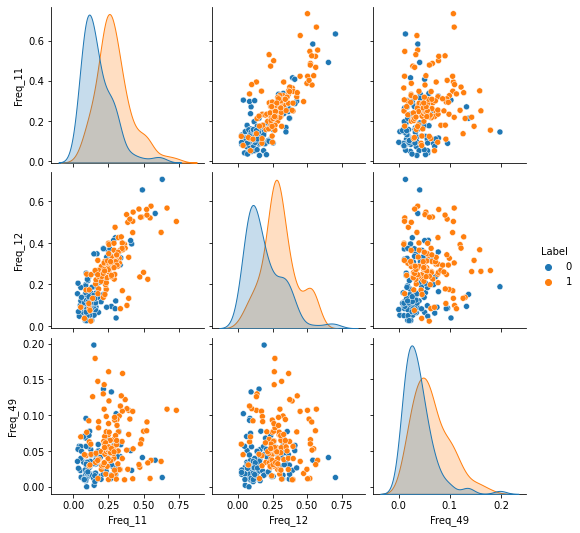

In [8]:
sns.pairplot(data = df_new,hue='Label')

### Building the KNN Model

**Splitting data and train-test-split**

In [9]:
X = df_new.drop('Label',axis=1)
y = df_new['Label']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**Creating Pipeline to impelment Grid Search CV**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [12]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [13]:
operations = [('scaler',scaler),('knn',knn)]

In [14]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [15]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1,50))

In [16]:
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [17]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

Getting the best K value as per our Grid CV runs

In [18]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=30))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=30),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 30,
 'knn__p': 2,
 'knn__weights': 'uniform'}

So, we see that using 30 nieghbours gives us the best accuracy for our given model created. However, let us also visualize the accuracy scores for different values of K.


In [28]:
accuracy_score = full_cv_classifier.cv_results_['mean_test_score']
len(accuracy_score)
accuracy_score[29]

0.7753911806543387

Text(0, 0.5, 'Accuracy Score')

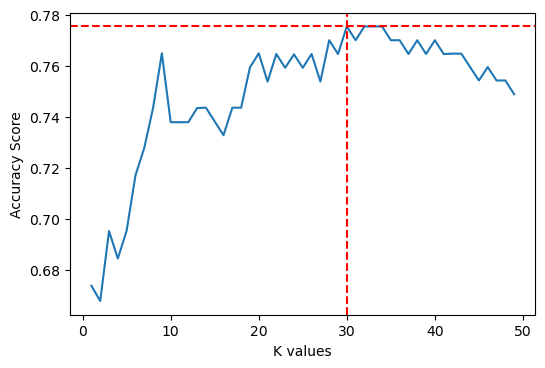

In [29]:
plt.figure(dpi = 100)
plt.plot(k_values, accuracy_score)
plt.axvline(x = 30, color = 'r', linestyle = '--')
plt.axhline(y = accuracy_score[29], color = 'r', linestyle = '--')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')

So it is quite evident visually that K = 30 is giving us the highest accuracy out of all chosen K values.


### Evaluating model parameters

In [21]:
#no need to scale X_test since the pipeline method already takes care of that
pred = full_cv_classifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
confusion_matrix(y_test,pred)

array([[ 6,  2],
       [ 1, 12]], dtype=int64)

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.86      0.92      0.89        13

    accuracy                           0.86        21
   macro avg       0.86      0.84      0.84        21
weighted avg       0.86      0.86      0.86        21



**So we see our model gives an accuracy of 86%. However, the recall is not very great, but it works for a small dataset! To get better values, we could incorporate more features say 5 instead of 3 we chose.**

### Let us check what values we get for new frequencies

In [30]:
new_freq = [[0.8156,0.806, 0.058]]

In [33]:
pred_new_freq = full_cv_classifier.predict(new_freq)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
pred_new_freq

array([1], dtype=int64)

**So, we see that for the given values of Freq 11, Freq 12 and Freq 49, our model classifies it as a Mine!**